In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import requests
from citipy import citipy
from config2 import weather_api_key
# Import the datetime module from the datetime library.
from datetime import datetime

In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

611

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lebu
Processing Record 2 of Set 1 | carnarvon
Processing Record 3 of Set 1 | coquimbo
Processing Record 4 of Set 1 | el campo
Processing Record 5 of Set 1 | kimberley
Processing Record 6 of Set 1 | new norfolk
Processing Record 7 of Set 1 | sinnamary
Processing Record 8 of Set 1 | port alfred
Processing Record 9 of Set 1 | beloha
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | haines junction
Processing Record 12 of Set 1 | rawson
Processing Record 13 of Set 1 | arraial do cabo
Processing Record 14 of Set 1 | sinkat
City not found. Skipping...
Processing Record 15 of Set 1 | yeppoon
Processing Record 16 of Set 1 | kapaa
Processing Record 17 of Set 1 | hobart
Processing Record 18 of Set 1 | jamestown
Processing Record 19 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 20 of Set 1 | hermanus
Processing Record 21 of Set 1 | puerto ayora
Processing Record

Processing Record 37 of Set 4 | shuangcheng
Processing Record 38 of Set 4 | isangel
Processing Record 39 of Set 4 | illoqqortoormiut
City not found. Skipping...
Processing Record 40 of Set 4 | port lincoln
Processing Record 41 of Set 4 | miragoane
Processing Record 42 of Set 4 | oranjestad
Processing Record 43 of Set 4 | kalur kot
Processing Record 44 of Set 4 | katsuura
Processing Record 45 of Set 4 | dehui
Processing Record 46 of Set 4 | sumbawa
City not found. Skipping...
Processing Record 47 of Set 4 | takhtamukay
Processing Record 48 of Set 4 | pozo colorado
Processing Record 49 of Set 4 | litoral del san juan
City not found. Skipping...
Processing Record 50 of Set 4 | timizart
Processing Record 1 of Set 5 | belushya guba
City not found. Skipping...
Processing Record 2 of Set 5 | luwuk
Processing Record 3 of Set 5 | camacha
Processing Record 4 of Set 5 | grand river south east
City not found. Skipping...
Processing Record 5 of Set 5 | leh
Processing Record 6 of Set 5 | mizoch
Proc

Processing Record 24 of Set 8 | flinders
Processing Record 25 of Set 8 | bend
Processing Record 26 of Set 8 | coihaique
Processing Record 27 of Set 8 | uchaly
Processing Record 28 of Set 8 | esso
Processing Record 29 of Set 8 | bundaberg
Processing Record 30 of Set 8 | deputatskiy
Processing Record 31 of Set 8 | san policarpo
Processing Record 32 of Set 8 | laguna
Processing Record 33 of Set 8 | college
Processing Record 34 of Set 8 | san juan de los morros
Processing Record 35 of Set 8 | victoria
Processing Record 36 of Set 8 | pacific grove
Processing Record 37 of Set 8 | cape elizabeth
City not found. Skipping...
Processing Record 38 of Set 8 | poya
Processing Record 39 of Set 8 | takoradi
Processing Record 40 of Set 8 | rutland
Processing Record 41 of Set 8 | port hardy
Processing Record 42 of Set 8 | xinyang
Processing Record 43 of Set 8 | nouadhibou
Processing Record 44 of Set 8 | ossora
Processing Record 45 of Set 8 | uk
City not found. Skipping...
Processing Record 46 of Set 8 

Processing Record 12 of Set 12 | swinford
Processing Record 13 of Set 12 | ajdabiya
Processing Record 14 of Set 12 | shaoyang
Processing Record 15 of Set 12 | byron bay
Processing Record 16 of Set 12 | ilo
Processing Record 17 of Set 12 | belle fourche
Processing Record 18 of Set 12 | uray
Processing Record 19 of Set 12 | daru
Processing Record 20 of Set 12 | athabasca
Processing Record 21 of Set 12 | bardiyah
Processing Record 22 of Set 12 | kapoeta
Processing Record 23 of Set 12 | rocha
Processing Record 24 of Set 12 | gaspar
Processing Record 25 of Set 12 | ous
Processing Record 26 of Set 12 | tessalit
Processing Record 27 of Set 12 | kings park
Processing Record 28 of Set 12 | lompoc
Processing Record 29 of Set 12 | greiz
Processing Record 30 of Set 12 | camargo
Processing Record 31 of Set 12 | riohacha
Processing Record 32 of Set 12 | mutare
Processing Record 33 of Set 12 | duz
City not found. Skipping...
Processing Record 34 of Set 12 | aden
Processing Record 35 of Set 12 | xicha

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lebu,-37.6167,-73.6500,55.27,67,21,23.62,CL,2022-03-30 21:15:39
1,Carnarvon,-24.8667,113.6333,77.07,88,100,3.44,AU,2022-03-30 21:11:07
2,Coquimbo,-29.9533,-71.3436,62.33,77,0,11.50,CL,2022-03-30 21:15:39
3,El Campo,29.1966,-96.2697,87.76,17,0,21.85,US,2022-03-30 21:15:40
4,Kimberley,-28.7323,24.7623,64.09,94,97,0.00,ZA,2022-03-30 21:15:40
5,New Norfolk,-42.7826,147.0587,51.30,68,60,1.99,AU,2022-03-30 21:15:41
6,Sinnamary,5.3833,-52.9500,78.26,78,97,8.03,GF,2022-03-30 21:15:41
7,Port Alfred,-33.5906,26.8910,65.17,75,100,1.01,ZA,2022-03-30 21:15:41
8,Beloha,-25.1667,45.0500,70.34,81,0,12.88,MG,2022-03-30 21:15:42
9,Rikitea,-23.1203,-134.9692,78.93,73,100,16.87,PF,2022-03-30 21:15:42


In [9]:
new_city_data = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
new_city_data

['City',
 'Country',
 'Date',
 'Lat',
 'Lng',
 'Max Temp',
 'Humidity',
 'Cloudiness',
 'Wind Speed']

In [10]:
city_data_df = city_data_df[new_city_data]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Lebu,CL,2022-03-30 21:15:39,-37.6167,-73.6500,55.27,67,21,23.62
1,Carnarvon,AU,2022-03-30 21:11:07,-24.8667,113.6333,77.07,88,100,3.44
2,Coquimbo,CL,2022-03-30 21:15:39,-29.9533,-71.3436,62.33,77,0,11.50
3,El Campo,US,2022-03-30 21:15:40,29.1966,-96.2697,87.76,17,0,21.85
4,Kimberley,ZA,2022-03-30 21:15:40,-28.7323,24.7623,64.09,94,97,0.00
5,New Norfolk,AU,2022-03-30 21:15:41,-42.7826,147.0587,51.30,68,60,1.99
6,Sinnamary,GF,2022-03-30 21:15:41,5.3833,-52.9500,78.26,78,97,8.03
7,Port Alfred,ZA,2022-03-30 21:15:41,-33.5906,26.8910,65.17,75,100,1.01
8,Beloha,MG,2022-03-30 21:15:42,-25.1667,45.0500,70.34,81,0,12.88
9,Rikitea,PF,2022-03-30 21:15:42,-23.1203,-134.9692,78.93,73,100,16.87


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

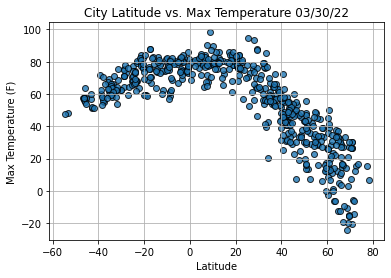

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

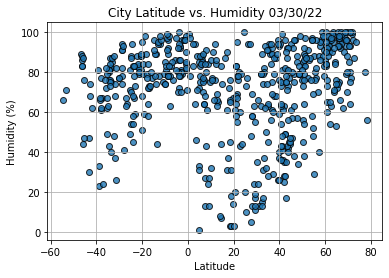

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

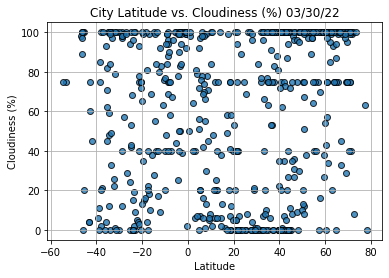

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

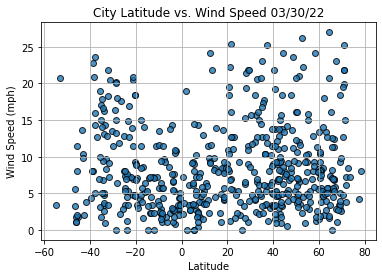

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [46]:
from scipy.stats import linregress

In [47]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [48]:
index13 = city_data_df.loc[13]
index13

City                      Yeppoon
Country                        AU
Date          2022-03-30 21:15:44
Lat                      -23.1333
Lng                      150.7333
Max Temp                    67.78
Humidity                       59
Cloudiness                      9
Wind Speed                   7.29
Name: 13, dtype: object

In [49]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
3,El Campo,US,2022-03-30 21:15:40,29.1966,-96.2697,87.76,17,0,21.85
6,Sinnamary,GF,2022-03-30 21:15:41,5.3833,-52.9500,78.26,78,97,8.03
10,Haines Junction,CA,2022-03-30 21:15:43,60.7522,-137.5108,39.15,60,100,5.75
14,Kapaa,US,2022-03-30 21:15:44,22.0752,-159.3190,79.48,76,40,12.66
16,Jamestown,US,2022-03-30 21:15:22,42.0970,-79.2353,55.53,35,100,11.01


In [71]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

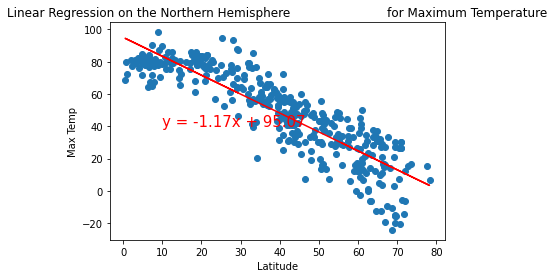

In [72]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

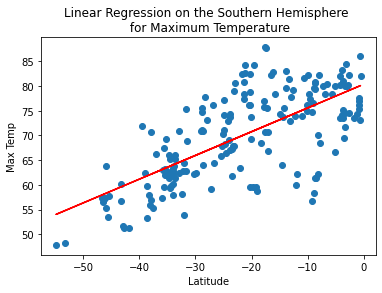

In [73]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

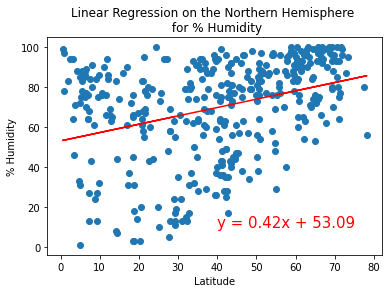

In [74]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

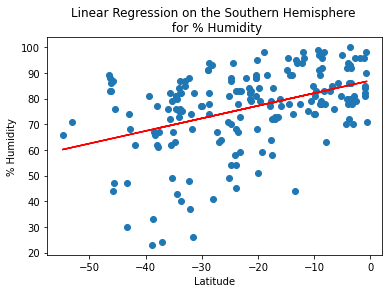

In [75]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(40,10))

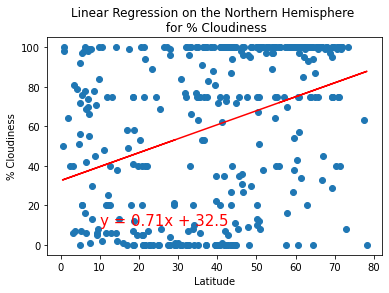

In [76]:
# Linear regression on the Northern Hemisphere humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(10,10))

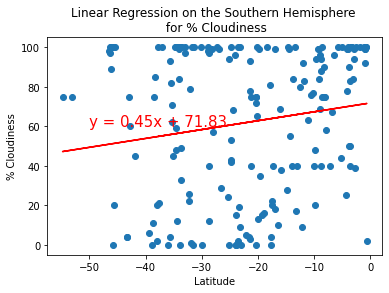

In [77]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

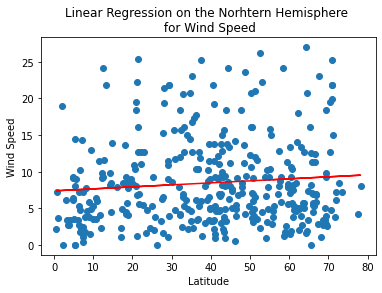

In [78]:
# Linear regression on the Northern Hemisphere for wind speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Norhtern Hemisphere \n for Wind Speed', 'Wind Speed', (20,35))

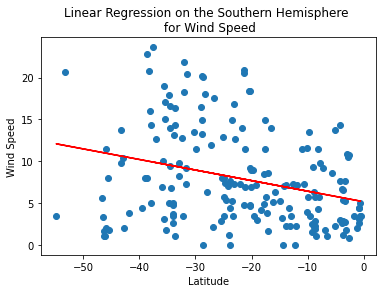

In [79]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))

In [ ]:
conda install -c conda-forge gmaps